## Problem 

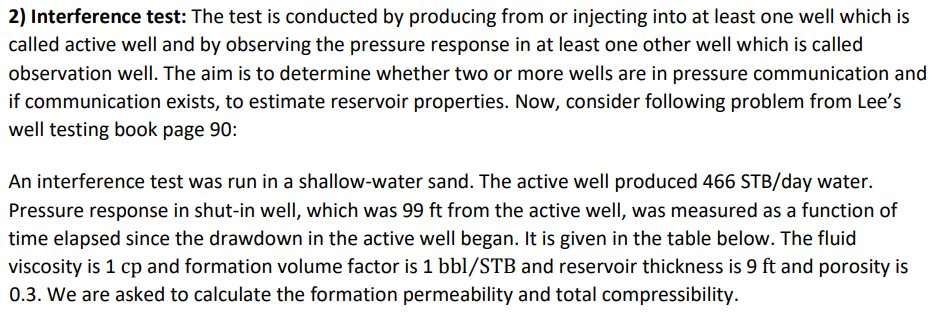
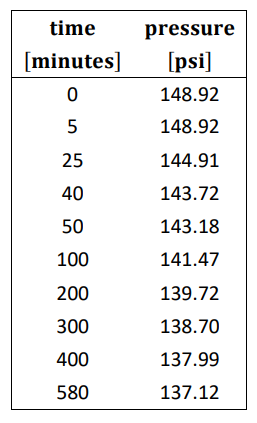
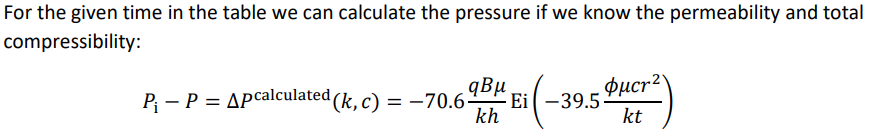

### Packages

In [1]:
from scipy.optimize import minimize
import scipy.special as sc
import matplotlib.pyplot as plt 
import numpy as np


In [2]:
#funciton of P 
def Pcalculated(t,k,c):
    Pcalc = (-70.6 * 466/(k * 9)) * sc.expi(-948 * 0.3 * c * 99**2*60/(k*t))
    return Pcalc


In [3]:
#timestamp & corresponding pressures
time = np.array([5,25,40,50,100,200,300,400,580])
Pressures_measured = np.array([148.92, 144.91, 143.72, 143.18, 141.47, 139.72, 138.70, 137.99, 137.12])

In [4]:
#subtract the pressures from intial pressure
Delta_P = Pressures_measured[0] -  Pressures_measured[1:]
# in order to put len of time and pressure arrays we should delete first element from time array
time = time[1:]


In [6]:
def compare(X):
    """Compare the Calculated Pressure with corresponding delta P from table
    
    We want from this function to return 0, thus we ll know that we found correct k and c values
    """
    k,c = X
    return np.sum(np.square(Delta_P - Pcalculated(time,k,c)))

In [7]:
#find the values of k,c that minimize compare function thus Pcalculated should be close to Delta_P, Square their subtraction should be close to zero  
sol = minimize(compare,(1000, 10**(-5)))
#unpacking
k,c = sol.x


### In order to test k and c values:

    Give last k&c to function to calculate corresponding Delta P and compare them with actual measured Delta P which calculated from table 

In [8]:
#calculate presssures for found k,c values on timestamp
t_range_for_calc = np.arange(5,580,0.01)

delta_pressures_calculated = Pcalculated(t_range_for_calc,k,c)

pressures_calculated = Pressures_measured[0] - delta_pressures_calculated


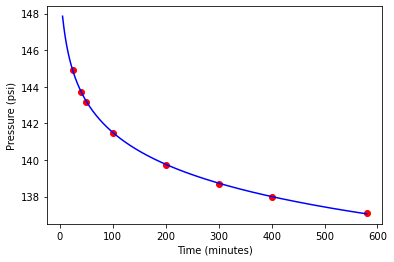

In [9]:
#plot where you are showing measured and calculated delta-pressure vs. time
plt.plot(t_range_for_calc, pressures_calculated,color='blue')
plt.scatter(time,Pressures_measured[1:],color='red')

plt.xlabel("Time (minutes)")
plt.ylabel("Pressure (psi)")
#show the plot
plt.show()
